## HOLIDAY PACKAGE SALES PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Travel.csv')   #Reading a csv file and converting it to a Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [3]:
df.head(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [4]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


## Data Visualization

### Categorical Data

In [5]:
target = pd.DataFrame()
target['ProdTaken'] = df['ProdTaken'].map({0:'Not Taken',1:'Taken'})
data = df.copy()
data = data.drop(['CustomerID','ProdTaken'],axis=1)

In [6]:
categorical_df = pd.DataFrame()
for col in data.select_dtypes(include=['object','int64']):
    categorical_df[col] = data[col]
categorical_df['PreferredPropertyStar'] = data['PreferredPropertyStar']

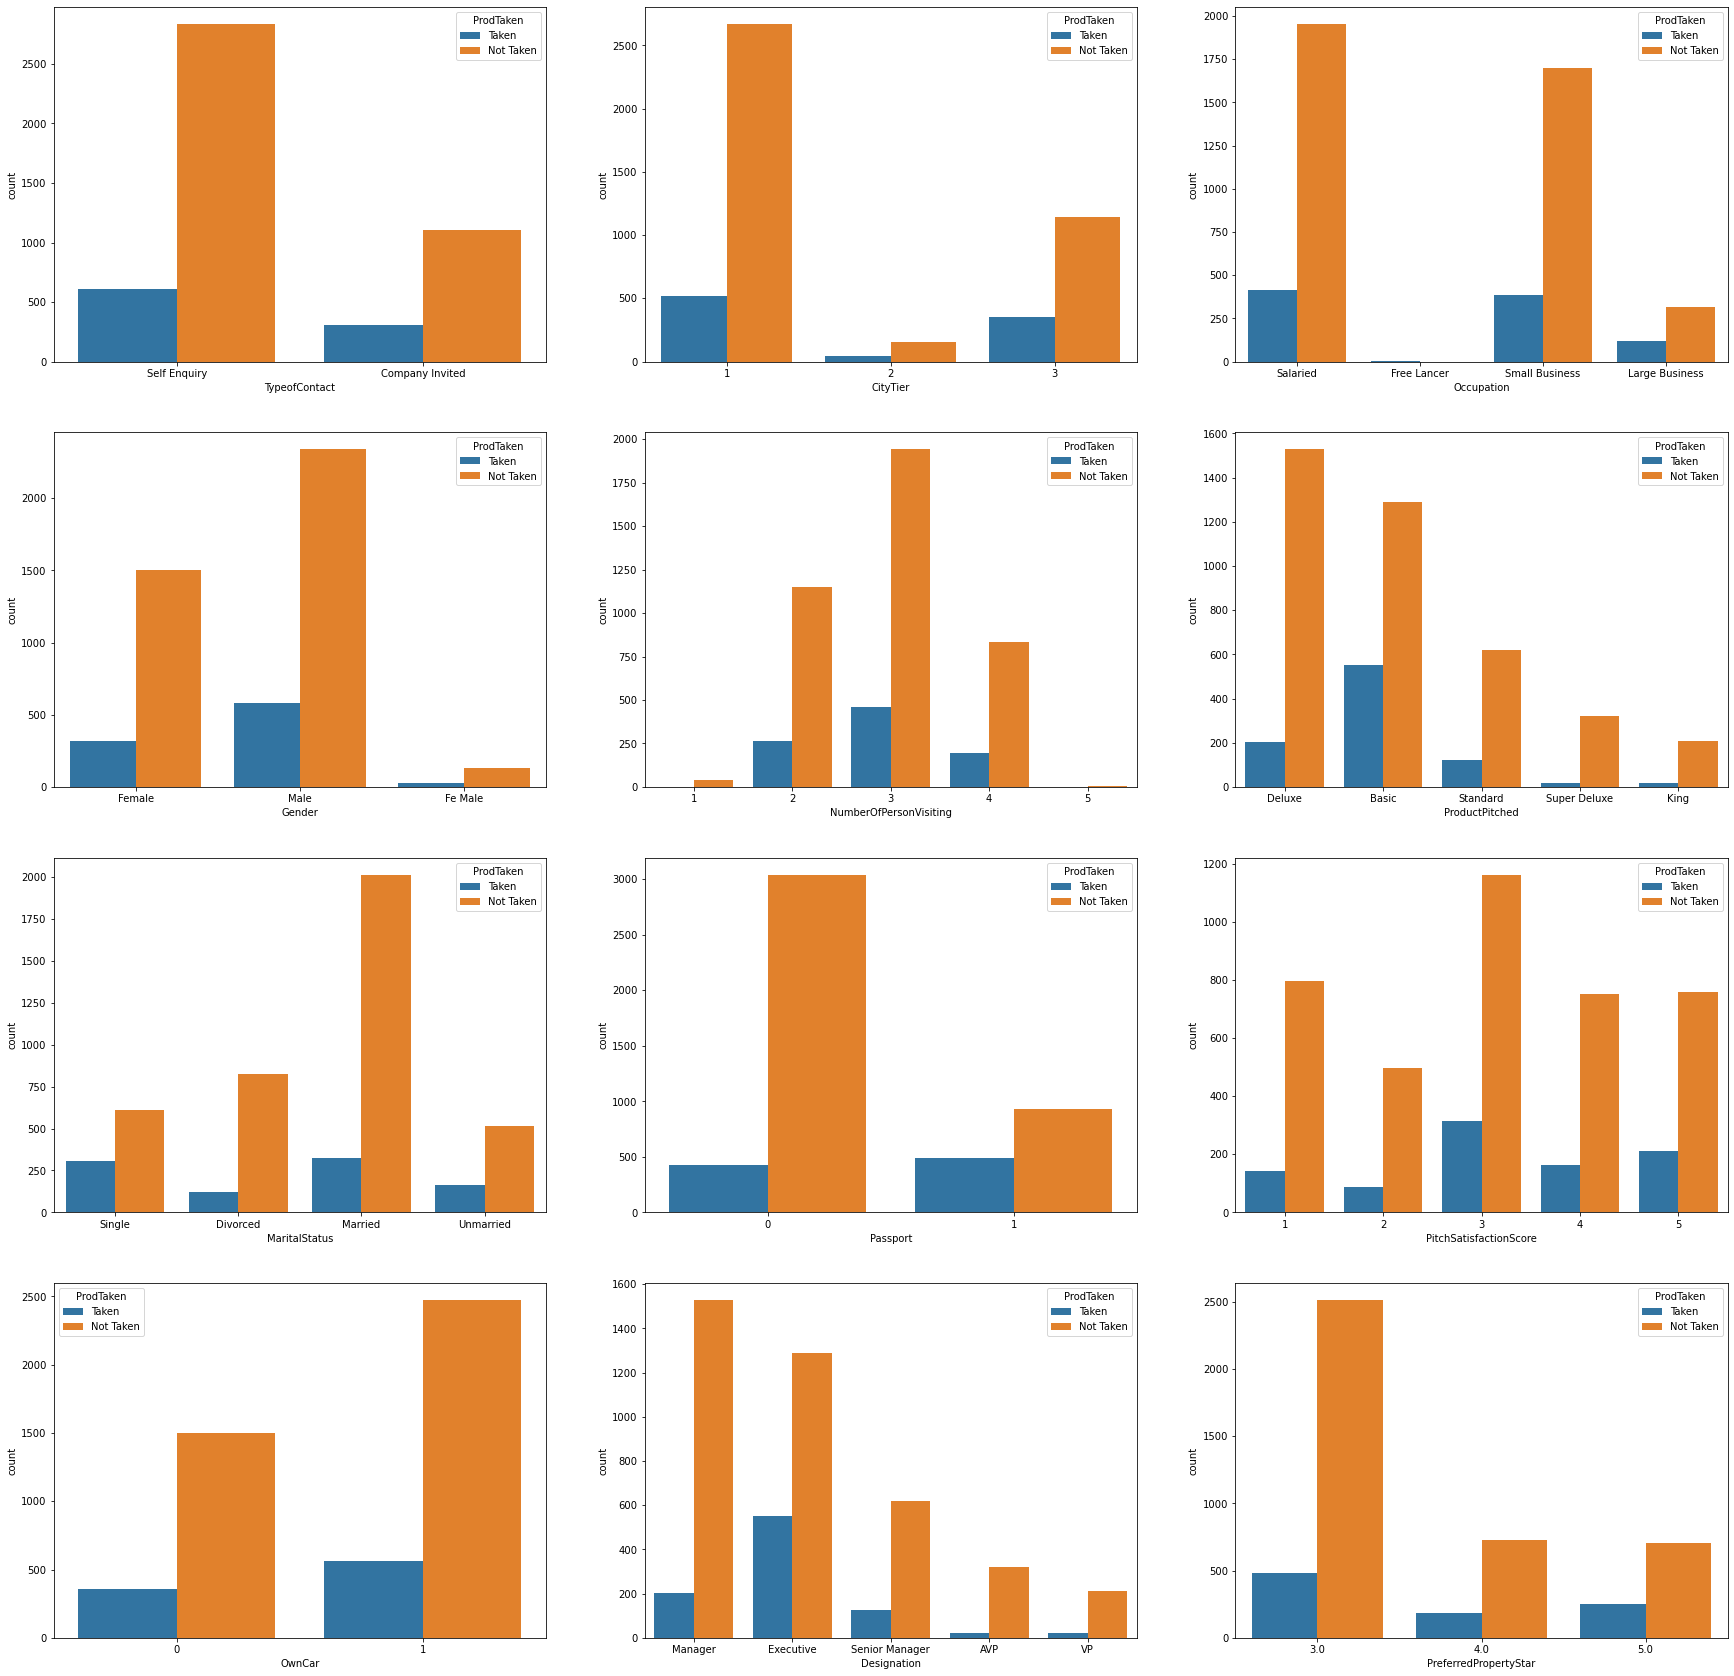

In [7]:
fig, ax = plt.subplots(4,3, figsize=(30, 30))
i=0
for col in categorical_df: 
    sns.countplot(categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

### Numeric Data

In [8]:
numeric_df = data.copy()
for col in categorical_df:
    numeric_df = numeric_df.drop(col,axis=1)

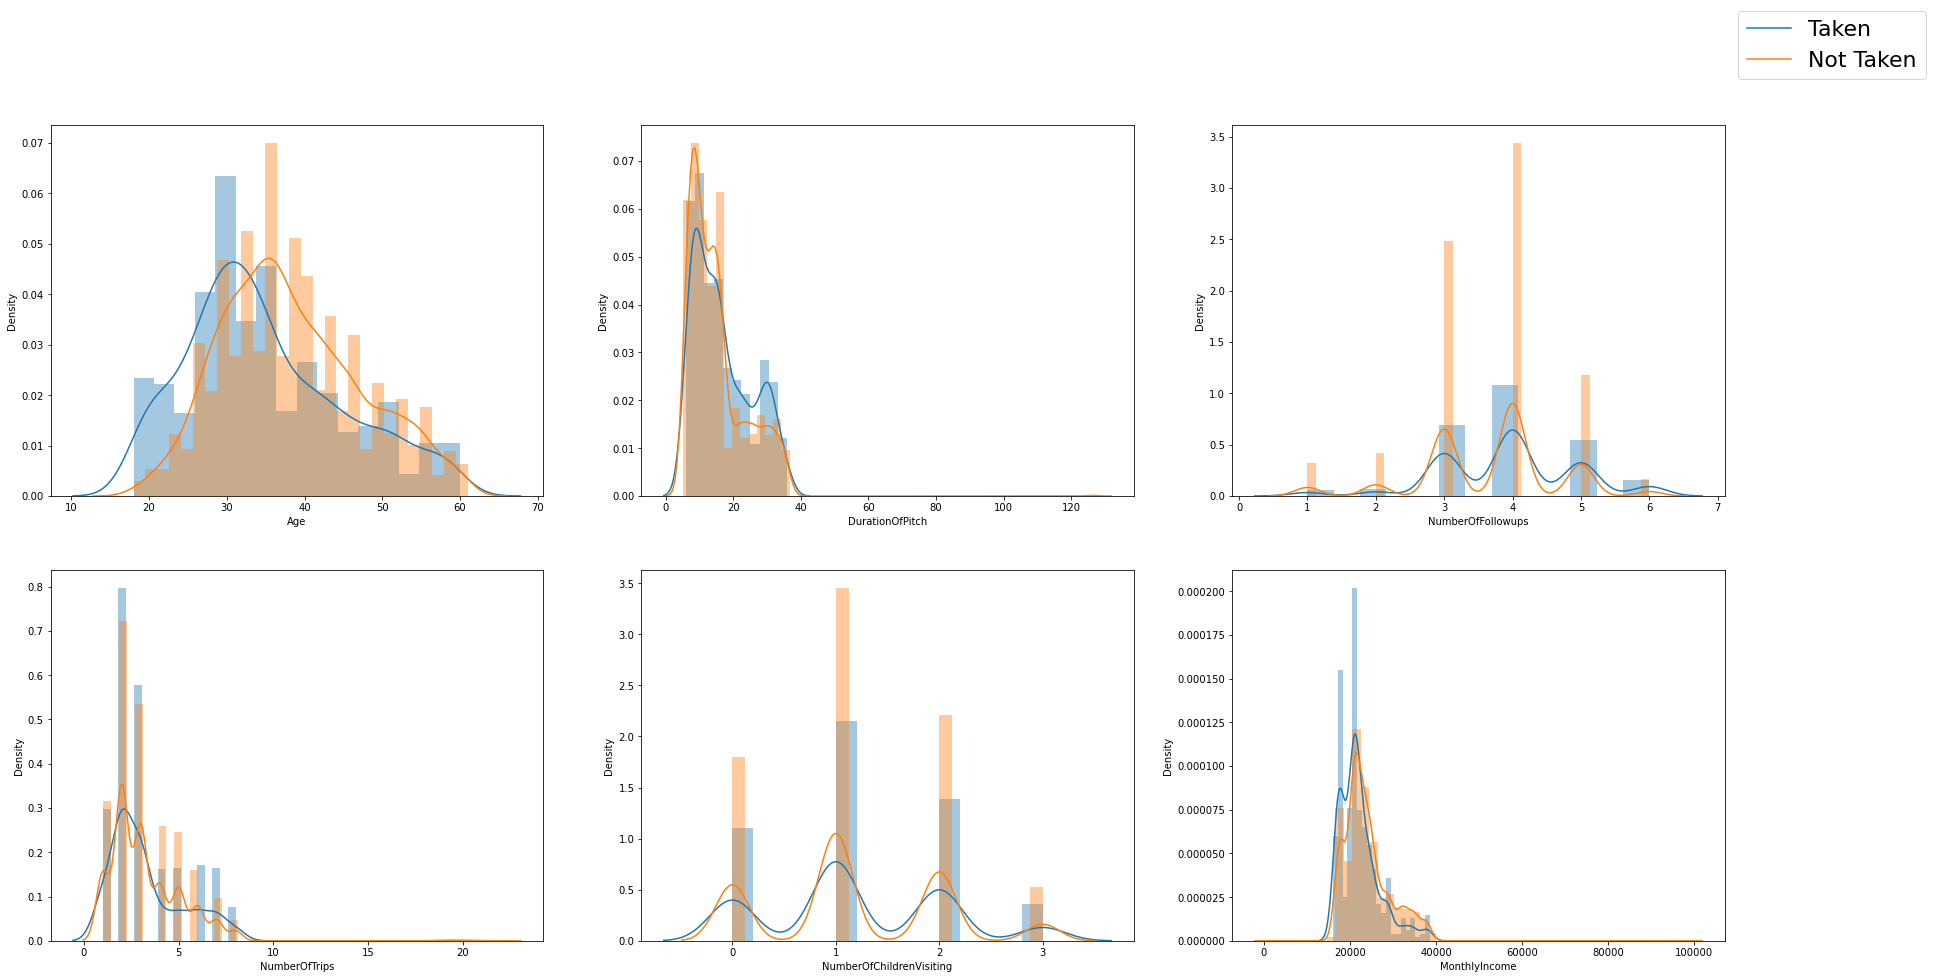

In [9]:
taken_df = numeric_df[target['ProdTaken']=="Taken"]
not_taken_df = numeric_df[target['ProdTaken']=="Not Taken"]
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//3][i%3])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()

In [10]:
df.columns
len(df.columns)

20

## Eliminate duplicates

In [11]:
print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 4888 rows
There is now 20 columns


## Feature Selection

### Correlation chart

<AxesSubplot:>

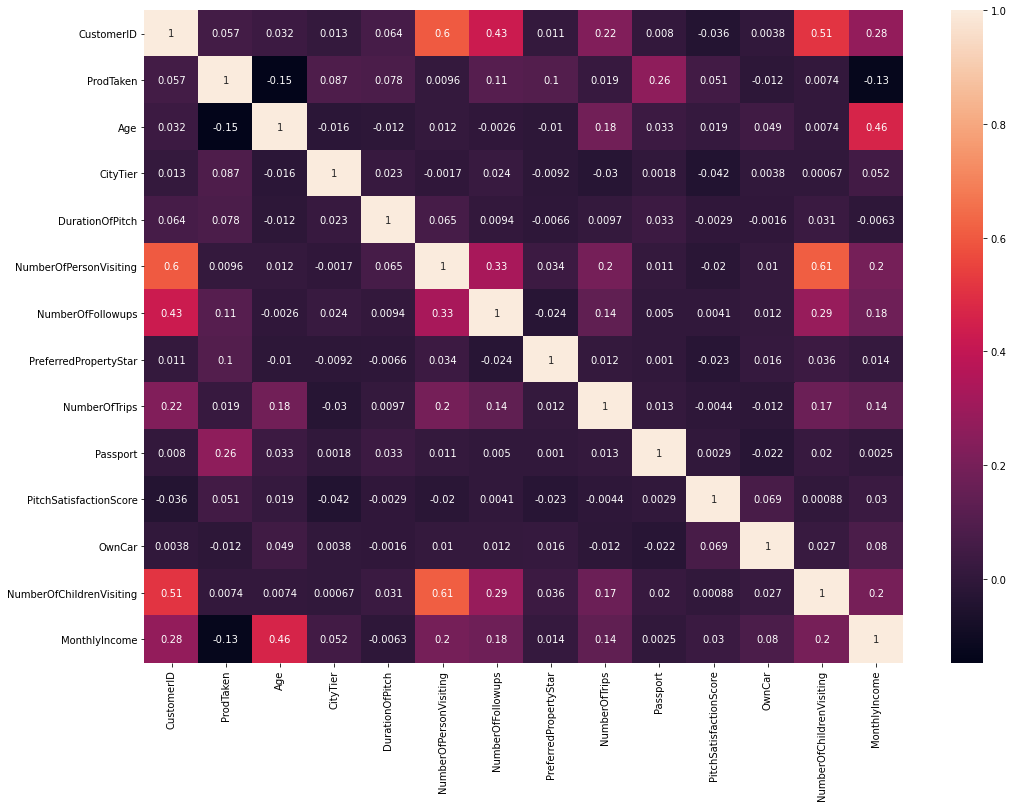

In [12]:
df_corr = df.corr()
plt.figure(figsize=(17,12))
sns.heatmap(df_corr,annot=True)  #Shows correlation among columns among each pair of columns ranging from -1 to 1

### Correlation of all columns with ProdTaken

In [13]:
df_corr['ProdTaken'].sort_values(ascending=False)

ProdTaken                   1.000000
Passport                    0.260844
NumberOfFollowups           0.112171
PreferredPropertyStar       0.099577
CityTier                    0.086852
DurationOfPitch             0.078257
CustomerID                  0.056506
PitchSatisfactionScore      0.051394
NumberOfTrips               0.018898
NumberOfPersonVisiting      0.009627
NumberOfChildrenVisiting    0.007421
OwnCar                     -0.011508
MonthlyIncome              -0.130585
Age                        -0.147254
Name: ProdTaken, dtype: float64

### Removing columns having close to zero correlation with ProdTaken

In [14]:
removeable_col = ['NumberOfChildrenVisiting','NumberOfPersonVisiting','NumberOfTrips','OwnCar']
df = df.drop(columns=removeable_col,axis=1) #axis 1 denotes along the columns

In [15]:
len(df.columns)

16

In [16]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                       226
TypeofContact              25
CityTier                    0
DurationOfPitch           251
Occupation                  0
Gender                      0
NumberOfFollowups          45
ProductPitched              0
PreferredPropertyStar      26
MaritalStatus               0
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome             233
dtype: int64

In [17]:
df['Gender'].unique()    # Gives an array with unique values present into the columns
dfx = df[df['Gender'] == 'Fe Male']
dfy = df[~(df['Gender'] == 'Fe Male')]

In [18]:
dfx['Gender'] = dfx['Gender'].str.replace('Fe Male','Female') # replacing string value

In [19]:
df_new = pd.concat((dfx,dfy))

## Null Value Removal

In [20]:
df_new.shape
df_new = df_new.fillna(0.0) #converting all the null values in the dataframe into 0
df_new.isnull().sum()

CustomerID                0
ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
Passport                  0
PitchSatisfactionScore    0
Designation               0
MonthlyIncome             0
dtype: int64

### Age

In [21]:
(df_new['Age']==0.0).sum()

226

In [22]:
df_new_x = df_new[df_new['Age']==0]
df_new_y = df_new[df_new['Age']!=0]

df_new_y.groupby(['Gender'])['CustomerID'].count()

avg_age = df_new_y.groupby('Gender')['Age'].mean()

def replace_zero_age(x):
  return float("{:.2f}".format(avg_age[x]))  #formatting value obtained to 2 decimal places

df_new_x['Age'] = df_new['Gender'].apply(replace_zero_age) #apply() is used to apply a function over a range of values

df_new = pd.concat((df_new_x,df_new_y),ignore_index=True)  # string function to concatenate 2 or more dataframes
print(df_new.shape)   #shows the dimensions of the dataframe (row,columns)
df_new = df_new.sort_values(by='CustomerID')  #sorting values of the dataframe according to the order of 1 or several columns
df_new.head()

(4888, 16)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
381,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
382,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
383,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
384,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
0,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


### DurationOfPitch

In [23]:
(df_new['DurationOfPitch']==0.0).sum()

251

In [24]:
df_new_x = df_new[df_new['DurationOfPitch']==0]
df_new_y = df_new[df_new['DurationOfPitch']!=0]

avg_duration = df_new_y.groupby('ProductPitched')['DurationOfPitch'].mean()

def replace_zero_duration(x):
  return float("{:.2f}".format(avg_duration[x]))

df_new_x['DurationOfPitch'] = df_new['ProductPitched'].apply(replace_zero_duration)

df_new = pd.concat((df_new_x,df_new_y),ignore_index=True)
print(df_new.shape)
df_new = df_new.sort_values(by='CustomerID')
df_new.head()

(4888, 16)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
251,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
252,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
253,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
254,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
255,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


### NumberOfFollowups

In [25]:
(df_new['NumberOfFollowups']==0.0).sum()

45

In [26]:
df_new_x = df_new[df_new['NumberOfFollowups']==0]
df_new_y = df_new[df_new['NumberOfFollowups']!=0]

avg_follow = df_new_y.groupby('ProductPitched')['NumberOfFollowups'].mean()

def replace_zero_followups(x):
  return float("{:.2f}".format(avg_duration[x]))

df_new_x['NumberOfFollowups'] = df_new['ProductPitched'].apply(replace_zero_followups)

df_new = pd.concat((df_new_x,df_new_y),ignore_index=True)
print(df_new.shape)
df_new = df_new.sort_values(by='CustomerID')
df_new.head()

(4888, 16)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
45,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
46,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
47,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
48,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
49,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


### PreferredPropertyStar

In [27]:
(df_new['PreferredPropertyStar']==0.0).sum()

26

In [28]:
df_new_x = df_new[df_new['PreferredPropertyStar']==0]
df_new_y = df_new[df_new['PreferredPropertyStar']!=0]

avg_duration = df_new_y.groupby('ProductPitched')['PreferredPropertyStar'].mean()

def replace_zero_star(x):
  return float("{:.2f}".format(avg_duration[x]))

df_new_x['PreferredPropertyStar'] = df_new['ProductPitched'].apply(replace_zero_star)

df_new = pd.concat((df_new_x,df_new_y),ignore_index=True)
print(df_new.shape)
df_new = df_new.sort_values(by='CustomerID')
df_new.head()

(4888, 16)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
26,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
27,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
28,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
29,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
30,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


### MonthlyIncome

In [29]:
(df_new['MonthlyIncome']==0.0).sum()

233

In [30]:
df_new_x = df_new[df_new['MonthlyIncome']==0]
df_new_y = df_new[df_new['MonthlyIncome']!=0]

avg_duration = df_new_y.groupby('Designation')['MonthlyIncome'].mean()

def replace_zero_income(x):
  return float("{:.2f}".format(avg_duration[x]))

df_new_x['MonthlyIncome'] = df_new['Designation'].apply(replace_zero_income)

df_new = pd.concat((df_new_x,df_new_y),ignore_index=True)
print(df_new.shape)
df_new = df_new.sort_values(by='CustomerID')
df_new.head()

(4888, 16)


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
233,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
234,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
235,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
236,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
237,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


In [31]:
print((df_new['Age']==0.0).sum())

print((df_new['DurationOfPitch']==0.0).sum())

print((df_new['NumberOfFollowups']==0.0).sum())

print((df_new['PreferredPropertyStar']==0.0).sum())

print((df_new['MonthlyIncome']==0.0).sum())

0
0
0
0
0


In [32]:
df_new.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
233,200000,1,41.00,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1,2,Manager,20993.0
234,200001,0,49.00,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,0,3,Manager,20130.0
235,200002,1,37.00,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,1,3,Executive,17090.0
236,200003,0,33.00,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,1,5,Executive,17909.0
237,200004,0,37.32,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,0,5,Executive,18468.0


## Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder() #class to convert non numerical data into numerical data by giving digit as counterpart to all unique groups
encoding_columns = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
for i in range(6):
    df_new[encoding_columns[i]] = df_new[encoding_columns[i]].astype('str')

In [35]:
for i in range(6):
    df_new[encoding_columns[i]] = le.fit_transform(df.loc[: , encoding_columns[i]])

In [36]:
df_new.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
233,200000,1,41.00,1,3,6.0,2,1,3.0,1,3.0,2,1,2,2,20993.0
234,200001,0,49.00,0,1,14.0,2,2,4.0,1,4.0,0,0,3,2,20130.0
235,200002,1,37.00,1,1,8.0,0,2,4.0,0,3.0,2,1,3,1,17090.0
236,200003,0,33.00,0,1,9.0,2,1,3.0,0,3.0,0,1,5,1,17909.0
237,200004,0,37.32,1,1,8.0,3,2,3.0,0,4.0,0,0,5,1,18468.0


In [37]:
for i in range(6):
    print(df_new[encoding_columns[i]].unique())

[1 0 2]
[2 0 3 1]
[1 2 0]
[1 0 3 4 2]
[2 0 1 3]
[2 1 3 0 4]


In [38]:
df_new = df_new.set_index(keys=np.arange(4888))  #Resetting Index

In [39]:
df_new.head(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,MonthlyIncome
0,200000,1,41.00,1,3,6.0,2,1,3.0,1,3.0,2,1,2,2,20993.0
1,200001,0,49.00,0,1,14.0,2,2,4.0,1,4.0,0,0,3,2,20130.0
2,200002,1,37.00,1,1,8.0,0,2,4.0,0,3.0,2,1,3,1,17090.0
3,200003,0,33.00,0,1,9.0,2,1,3.0,0,3.0,0,1,5,1,17909.0
4,200004,0,37.32,1,1,8.0,3,2,3.0,0,4.0,0,0,5,1,18468.0
5,200005,0,32.00,0,1,8.0,2,2,3.0,0,3.0,2,0,5,1,18068.0
6,200006,0,59.00,1,1,9.0,3,1,2.0,0,5.0,0,1,2,1,17670.0
7,200007,0,30.00,1,1,30.0,2,2,3.0,0,3.0,1,0,2,1,17693.0
8,200008,0,38.00,0,1,29.0,2,2,4.0,3,3.0,3,0,3,3,24526.0
9,200009,0,36.00,1,1,33.0,3,2,3.0,1,3.0,0,0,3,2,20237.0


In [40]:
df_new.isnull().sum()

CustomerID                0
ProdTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
Passport                  0
PitchSatisfactionScore    0
Designation               0
MonthlyIncome             0
dtype: int64

## Model Selection and Prediction

In [41]:
df_data = df_new.values # .values converts dataframe into array of same dimensions
X = df_data[: , [2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
Y = df_data[: , 1]

In [42]:
print(X)
print(Y)

[[4.1000e+01 1.0000e+00 3.0000e+00 ... 2.0000e+00 2.0000e+00 2.0993e+04]
 [4.9000e+01 0.0000e+00 1.0000e+00 ... 3.0000e+00 2.0000e+00 2.0130e+04]
 [3.7000e+01 1.0000e+00 1.0000e+00 ... 3.0000e+00 1.0000e+00 1.7090e+04]
 ...
 [5.2000e+01 1.0000e+00 3.0000e+00 ... 1.0000e+00 3.0000e+00 3.1820e+04]
 [1.9000e+01 1.0000e+00 3.0000e+00 ... 5.0000e+00 1.0000e+00 2.0289e+04]
 [3.6000e+01 1.0000e+00 1.0000e+00 ... 3.0000e+00 1.0000e+00 2.4041e+04]]
[1. 0. 1. ... 1. 1. 1.]


### Spliting into Train and Test data 

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y) #splits data into training and testing sets for model predictions

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

lmodel = LogisticRegression()
dmodel = DecisionTreeClassifier(criterion='entropy',max_depth=5)
rfc = RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=8)
rfr = RandomForestRegressor(n_estimators = 100,random_state=0)
xmodel = XGBClassifier()
kmodel = KNeighborsClassifier()

In [45]:
lmodel.fit(xtrain,ytrain)
lmodel.predict(xtrain)

dmodel.fit(xtrain,ytrain)
dmodel.predict(xtrain)

rfc.fit(xtrain,ytrain)
rfc.predict(xtrain)

rfr.fit(xtrain,ytrain)
rfr.predict(xtrain)

kmodel.fit(xtrain,ytrain)
kmodel.predict(xtrain)

xmodel.fit(xtrain,ytrain)
xmodel.predict(xtrain)

[13:04:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1., 0., 0., ..., 1., 1., 1.])

In [46]:
acc_l_1 = cross_val_score(lmodel,xtrain,ytrain,cv=15).mean() #returns score of test fold values
acc_l_2 = cross_val_score(lmodel,xtest,ytest,cv=15).mean()

acc_d_1 = cross_val_score(dmodel,xtrain,ytrain,cv=15).mean()
acc_d_2 = cross_val_score(dmodel,xtest,ytest,cv=15).mean()

acc_rfc_1 = cross_val_score(rfc,xtrain,ytrain,cv=15).mean()
acc_rfc_2 = cross_val_score(rfc,xtest,ytest,cv=15).mean()

acc_rfr_1 = cross_val_score(rfr,xtrain,ytrain,cv=15).mean()
acc_rfr_2 = cross_val_score(rfr,xtest,ytest,cv=15).mean()

acc_k_1 = cross_val_score(kmodel,xtrain,ytrain,cv=15).mean()
acc_k_2 = cross_val_score(kmodel,xtest,ytest,cv=15).mean()

acc_x_1 = cross_val_score(kmodel,xtrain,ytrain,cv=15).mean()
acc_x_2 = cross_val_score(kmodel,xtest,ytest,cv=15).mean()


### Model Comparison

In [47]:
print('The train and test accuracy for LogisticRegression is '+str(acc_l_1)+' & '+str(acc_l_2)+' respectively')
print('The train and test accuracy for DecisionTreeClassifier is '+str(acc_d_1)+' & '+str(acc_d_2)+' respectively')
print('The train and test accuracy for RandomForestClassifier is '+str(acc_rfc_1)+' & '+str(acc_rfc_2)+' respectively')
print('The train and test accuracy for RandomForestRegressor is '+str(acc_rfr_1)+' & '+str(acc_rfr_2)+' respectively')
print('The train and test accuracy for KNeighborsClassifier is '+str(acc_k_1)+' & '+str(acc_k_2)+' respectively')
print('The train and test accuracy for XGBClassifier is '+str(acc_x_1)+' & '+str(acc_x_2)+' respectively')

The train and test accuracy for LogisticRegression is 0.8166967770714844 & 0.8281340961557764 respectively
The train and test accuracy for DecisionTreeClassifier is 0.8467090442734471 & 0.8354411321890995 respectively
The train and test accuracy for RandomForestClassifier is 0.8636154789784766 & 0.8568001605941985 respectively
The train and test accuracy for RandomForestRegressor is 0.6416676703035995 & 0.3688788288413815 respectively
The train and test accuracy for KNeighborsClassifier is 0.7967804170848668 & 0.7879755093847235 respectively
The train and test accuracy for XGBClassifier is 0.7967804170848668 & 0.7879755093847235 respectively


### Predictions on the best performing model

In [48]:
y_pred = rfc.predict(xtest)

In [49]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
ytest.shape
y_pred.shape
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
ytest

array([0., 0., 0., ..., 0., 0., 1.])

## Determining the accuracy of the model

In [52]:
def accuracy(Y,y):
    m = Y.shape[0]
    count = 0
    for i in range(m):
        if(y[i] == Y[i]):
            count += 1
    return (count/m)*100

In [53]:
print("Training Data accuracy - ",accuracy(ytrain,rfc.predict(xtrain)))
print("Testing Data accuracy - ",accuracy(ytest,y_pred))

Training Data accuracy -  90.78014184397163
Testing Data accuracy -  88.70703764320785


## Moving Predicted values to csv file

In [54]:
y_pred = pd.DataFrame(y_pred,columns=['Prediction'])
y_pred_train = pd.DataFrame(rfc.predict(xtrain),columns=['Prediction'])

customer_details = df_new['CustomerID'].values
split = xtrain.shape[0]
customer_details_train = customer_details[:split]   #splitting details according to train and test shape
customer_details_test = customer_details[split:]

details_train = pd.DataFrame(customer_details_train,columns=['CustomerID'])
details_test = pd.DataFrame(customer_details_test,columns=['CustomerID'])

y_pred_train = pd.concat((details_train,y_pred_train),axis=1)
y_pred = pd.concat((details_test,y_pred),axis=1)
    
y_pred.to_csv('test_data_prediction.csv',index=False)
y_pred_train.to_csv('train_data_prediction.csv',index=False)

## Model Transportation

In [55]:
from joblib import dump,load

In [56]:
dump(rfc,'RandomForestClassifier.joblib') #transporting model for usage into another file

['RandomForestClassifier.joblib']